### Centerline extraction demo using geodesic distance transform 
#### Reference.
Teng, Pang-yu, Ahmet Murat Bagci, and Noam Alperin. "Automated prescription of an optimal imaging plane for measurement of cerebral blood flow by phase contrast magnetic resonance imaging." IEEE Transactions on Biomedical Engineering 58.9 (2011): 2566-2573.
https://www.ncbi.nlm.nih.gov/pubmed/21672671

In [1]:
import numpy as np
from scipy.ndimage.morphology import binary_dilation
from scipy import interpolate
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
num = 10000
def mock_image():
    mpl.rcParams['legend.fontsize'] = 10    
    const = 100
    theta = np.linspace(-4 * np.pi, 4 * np.pi, num)
    z = np.linspace(0, 10, num)
    r = z**2 + 3
    x = r * np.sin(theta) + const
    y = r * np.cos(theta) + const
    img = np.zeros([256,256,15])
    for i,j,k in zip(x,y,z):
        img[i,j,k]=1
    img=binary_dilation(img,iterations=5)
    return img,x,y,z


In [31]:
img,x,y,z = mock_image()
start_point = np.array([x[0],y[0],z[0]]).astype(int)
end_point = np.array([x[-1],y[-1],z[-1]]).astype(int)
from extract_centerline import extract_centerline
search_radius=(1,1,1)
centerline_list = extract_centerline(img,start_point,end_point,search_radius=search_radius)
c_x,c_y,c_z = centerline_list

c:\python33\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if sys.path[0] == '':


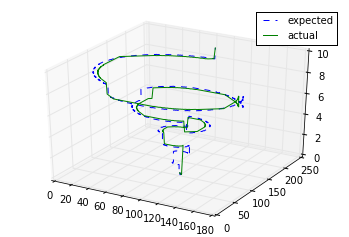

In [53]:
x_int = x.astype(int)
y_int = y.astype(int)
z_int = z.astype(int)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_int, y_int, z_int, label='expected',linestyle='--')
ax.plot(c_x,c_y,c_z, label='actual')
ax.legend()

In [57]:
from scipy.interpolate import UnivariateSpline

def smooth_3d_array(x,y,z,num=None,**kwargs):
    if num is None:
        num = len(x)
    w = np.arange(0,len(x),1)
    sx = UnivariateSpline(w,x,**kwargs)
    sy = UnivariateSpline(w,y,**kwargs)
    sz = UnivariateSpline(w,z,**kwargs)
    wnew = np.linspace(0,len(c_x),num)
    return sx(wnew),sy(wnew),sz(wnew)


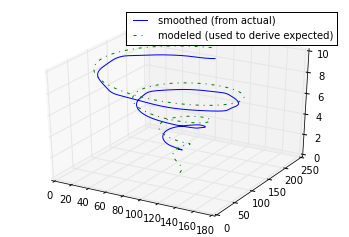

In [58]:
smothing_factor = 100
# original paper used cubic smoothing spline, not the below.
s_x,s_y,s_z = smooth_3d_array(c_x,c_y,c_z,s=smothing_factor)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(s_x,s_y,s_z, label='smoothed (from actual)')
ax.plot(x, y, z, label='modeled (used to derive expected)',linestyle='-.')
ax.legend()
plt.show()